In [1]:
using Perla1, DataFrames, DataFramesMeta, CSV

In [2]:
using Plots
gr(fmt = :png)

Plots.GRBackend()

In [3]:
δ_Ms = range(0.0225, 0.18, length = 40)
σs = range(0.05, 0.5, length = 40)
θs = range(0.02, 0.10, length = 40)
params_default = stationary_params_default()
settings = stationary_settings_default()

(expectation_node_count = 20, ss_iv = Perla1.ss_iv_default)

# Baseline results

In [4]:
# solve steady states
params = params_default
ss = steadystate(params, settings)

println("Baseline Results:")
@show params.δ_M
@show params.σ
@show ss.labor_share
@show ss.capital_share 
@show ss.profit_share 
@show ss.Q
@show ss.B
@show ss.Z
@show ss.k
@show ss.M;

Baseline Results:
params.δ_M = 0.056
params.σ = 0.15
ss.labor_share = 0.5776209864750184
ss.capital_share = 0.22463038362917384
ss.profit_share = 0.19774862989580777
ss.Q = 0.7546898959261612
ss.B = 0.8022513701041922
ss.Z = 4.98415282407618
ss.k = 38.898217160873415
ss.M = 64.61497867288274


In [5]:
# dataframe for later output
ss_baseline = DataFrame(σs = params.σ, δ_Ms = params.δ_M, labor_shares = ss.labor_share,
                        capital_shares = ss.capital_share, profit_shares = ss.profit_share,
                        Qs = ss.Q, Bs = ss.B, Zs = ss.Z, ks = ss.k, Ms = ss.M,
                        θs = params.θ, change_by = "baseline");

# Results by `δ_M`

In [6]:
ss_by_δ_M = DataFrame()

for δ_M in δ_Ms
    # fix other parameters other than δ_M
    params = merge(params_default, (δ_M = δ_M, ))
    ss = steadystate(params, settings)
    
    push!(ss_by_δ_M, (labor_shares = ss.labor_share, 
            capital_shares = ss.capital_share, 
            profit_shares = ss.profit_share,
            Qs = ss.Q, 
            Bs = ss.B, 
            Zs = ss.Z,
            ks = ss.k, 
            Ms = ss.M,
            σs = params.σ, 
            θs = params.θ,
            δ_Ms = δ_M))
end

ss_by_δ_M.change_by = "delta_M";

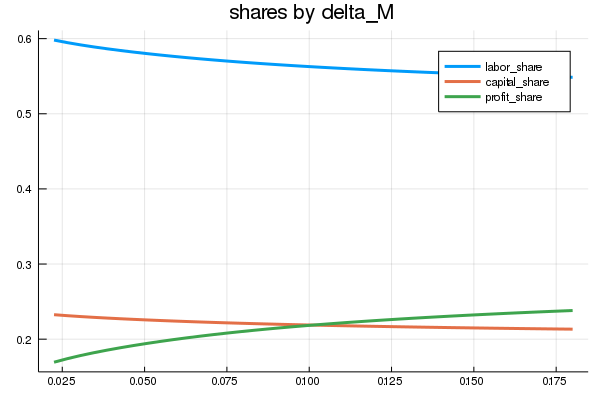

In [7]:
plot(ss_by_δ_M.δ_Ms, [ss_by_δ_M.labor_shares ss_by_δ_M.capital_shares ss_by_δ_M.profit_shares], 
    label = ["labor_share", "capital_share", "profit_share"], 
    title = "shares by delta_M", lw = 3)

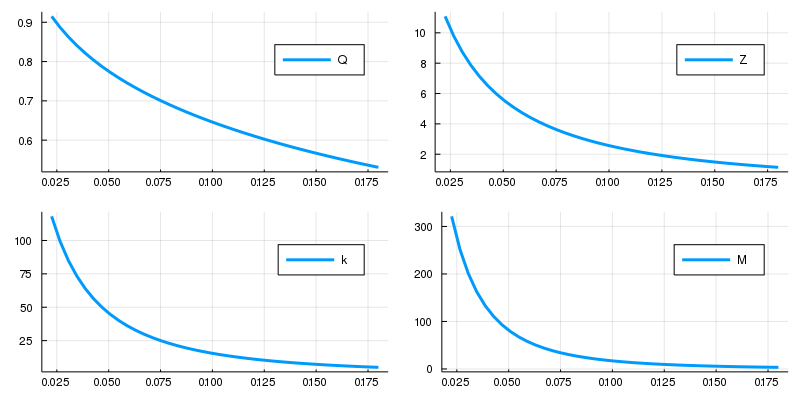

In [8]:
plot1 = plot(δ_Ms, ss_by_δ_M.Qs, label = "Q", lw = 3)
plot2 = plot(δ_Ms, ss_by_δ_M.Zs, label = "Z", lw = 3)
plot3 = plot(δ_Ms, ss_by_δ_M.ks, label = "k", lw = 3)
plot4 = plot(δ_Ms, ss_by_δ_M.Ms, label = "M", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2), size = (800, 400))

# Results by `σ`

In [9]:
ss_by_σ = DataFrame()

for σ in σs
    # fix other parameters other than δ_M
    params = merge(params_default, (σ = σ, ))
    ss = steadystate(params, settings)
    
    push!(ss_by_σ, (labor_shares = ss.labor_share, 
            capital_shares = ss.capital_share, 
            profit_shares = ss.profit_share,
            Qs = ss.Q, 
            Bs = ss.B, 
            Zs = ss.Z,
            ks = ss.k, 
            Ms = ss.M,
            σs = params.σ, 
            θs = params.θ,
            δ_Ms = params.δ_M))
end

ss_by_σ.change_by = "sigma";

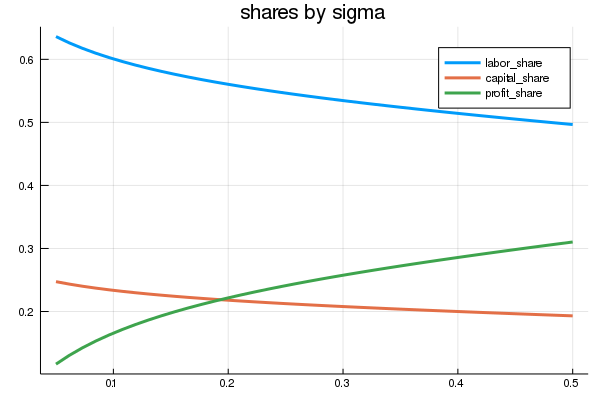

In [10]:
plot(σs, [ss_by_σ.labor_shares ss_by_σ.capital_shares ss_by_σ.profit_shares], 
    label = ["labor_share", "capital_share", "profit_share"], 
    title = "shares by sigma", lw = 3)

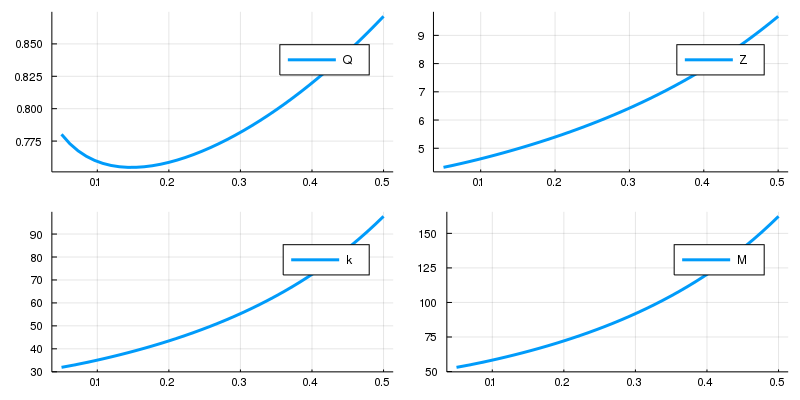

In [11]:
plot1 = plot(σs, ss_by_σ.Qs, label = "Q", lw = 3)
plot2 = plot(σs, ss_by_σ.Zs, label = "Z", lw = 3)
plot3 = plot(σs, ss_by_σ.ks, label = "k", lw = 3)
plot4 = plot(σs, ss_by_σ.Ms, label = "M", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2), size = (800, 400))

# Results by `θ`

In [12]:
ss_by_θ = DataFrame()

for θ in θs
    # fix other parameters other than δ_M
    params = merge(params_default, (θ = θ, ))
    ss = steadystate(params, settings)
    
    push!(ss_by_θ, (labor_shares = ss.labor_share, 
            capital_shares = ss.capital_share, 
            profit_shares = ss.profit_share,
            Qs = ss.Q, 
            Bs = ss.B, 
            Zs = ss.Z,
            ks = ss.k, 
            Ms = ss.M,
            σs = params.σ, 
            θs = params.θ,
            δ_Ms = params.δ_M))
end

ss_by_θ.change_by = "theta";

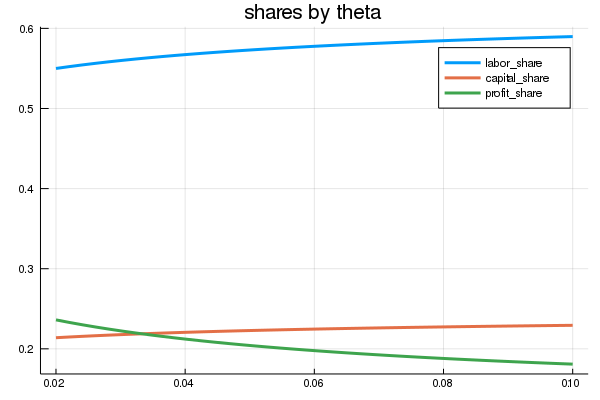

In [13]:
plot(θs, [ss_by_θ.labor_shares ss_by_θ.capital_shares ss_by_θ.profit_shares], 
    label = ["labor_share", "capital_share", "profit_share"], 
    title = "shares by theta", lw = 3)

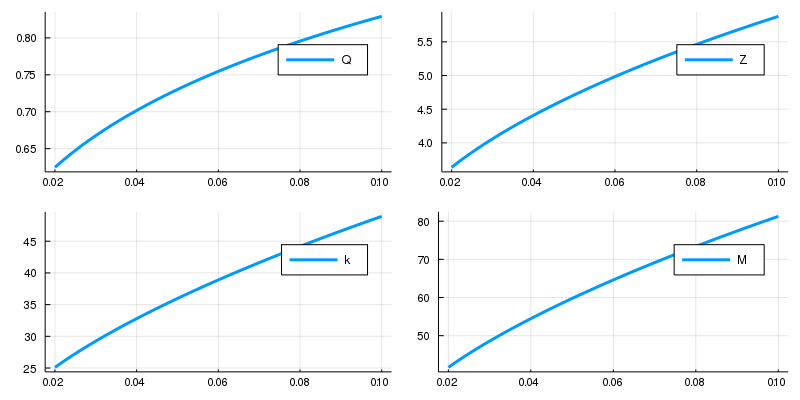

In [14]:
plot1 = plot(θs, ss_by_θ.Qs, label = "Q", lw = 3)
plot2 = plot(θs, ss_by_θ.Zs, label = "Z", lw = 3)
plot3 = plot(θs, ss_by_θ.ks, label = "k", lw = 3)
plot4 = plot(θs, ss_by_θ.Ms, label = "M", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2), size = (800, 400))

# Write CSV

In [15]:
steady_states = vcat(ss_by_δ_M, ss_by_σ, ss_by_θ, ss_baseline)

# change unicode column names to English
rename!(steady_states, :δ_Ms => :delta_M)
rename!(steady_states, :σs => :sigma)
rename!(steady_states, :θs => :theta)

CSV.write("exogenous_comparative_statics.csv", steady_states)
steady_states

,labor_shares,capital_shares,profit_shares,Qs,Bs,Zs,ks
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.598072,0.232583,0.169345,0.915074,0.830655,11.0865,118.075
2,0.594684,0.231266,0.174051,0.887208,0.825949,9.79854,99.464
3,0.591666,0.230092,0.178242,0.862821,0.821758,8.74844,84.9747
4,0.588952,0.229037,0.182012,0.841097,0.817988,7.87554,73.4322
5,0.586476,0.228074,0.18545,0.821533,0.81455,7.14007,64.0841
6,0.584187,0.227184,0.188629,0.803763,0.811371,6.5135,56.4092
7,0.582051,0.226353,0.191596,0.787502,0.808404,5.97433,50.0302
8,0.580046,0.225573,0.19438,0.772517,0.80562,5.50602,44.6678
9,0.578158,0.224839,0.197003,0.758612,0.802997,5.09573,40.1128
